# Introduction

Let's deep into a dataset all about LEGO. We'll can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. .csv files provided in 'data' folder. 

<img src="assets/bricks.jpg">

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

How many different colours does the LEGO company produce?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
colors = pd.read_csv('data/colors.csv')
colors.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [ ]:
colors.nunique(axis=0, dropna=False)
colors.nunique()
colors['name'].nunique()

135

The number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [ ]:
a = colors.groupby('is_trans').count()
a[['id']]

,id
is_trans,
f,107
t,28


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
colors = pd.read_csv('data/colors.csv')
colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### **Understanding LEGO Themes vs. LEGO Sets**

##### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

##### A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

Reading the sets.csv data and take a look at the first and last couple of rows. 

In [4]:
sets = pd.read_csv('data/sets.csv')
sets.head()
sets.tail()
type(sets['year'][4789])


numpy.int64

In which year were the first LEGO sets released and what were these sets called?

In [29]:
a = sets.sort_values('year')
a.head(10)

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9547,700.B.2-1,Single 1 x 2 x 3 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [33]:
sets[sets['year'] == 1949]
sets['name'][sets['year'] == 1949].nunique()

5

Find the top 5 LEGO sets with the most number of parts. 

In [45]:
a = sets.sort_values('num_parts', ascending=False)
a.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [44]:
sets.loc[sets['num_parts'].idxmax()]

set_num                           BIGBOX-1
name         The Ultimate Battle for Chima
year                                  2015
theme_id                               571
num_parts                             9987
Name: 15004, dtype: object

Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [50]:
a = sets.groupby('year').count()
a[['set_num']]

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28
...,...
2017,786
2018,816
2019,840


In [10]:
sets = pd.read_csv('data/sets.csv')
a = sets.groupby('year').count()
a
type(sets['year'][3]) # int64
b = a[['set_num']]
b_55 = b.loc[1955, 'set_num']
b_19 = b.loc[2019, 'set_num']
b_19
print(f"In 1955 created {b_55} sets and in 2019 - {b_19} sets.")
b.shape

In 1955 created 28 sets and in 2019 - 840 sets.


(71, 1)

Show the number of LEGO releases <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

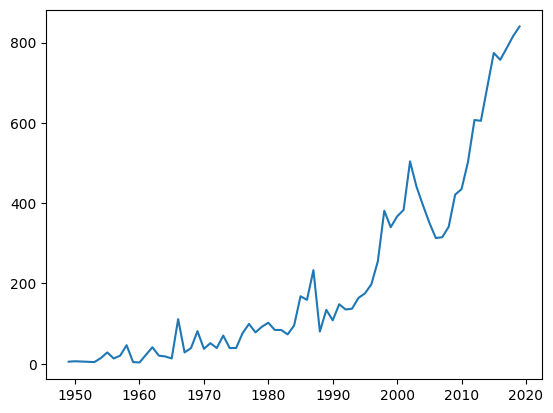

In [28]:
# sets = pd.read_csv('data/sets.csv')
# a = sets.groupby('year').count()
# b = a[['set_num']]
plt.plot(b.index[:-2], b.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [38]:
f = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
f.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
f

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

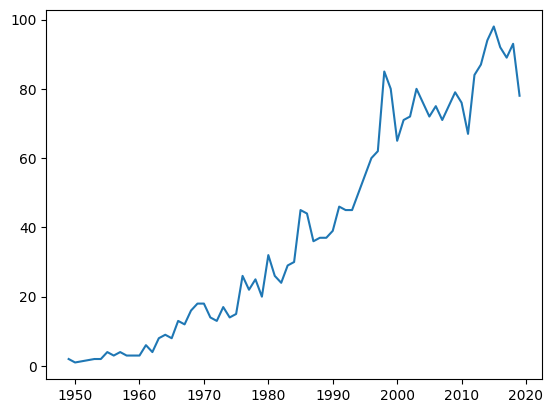

In [39]:
plt.plot(f.index[:-2], f.nr_themes[:-2])

### Line Charts with Two Separate Axes

In [ ]:
sets = pd.read_csv('data/sets.csv')
a = sets.groupby('year').count()
a
b = a[['set_num']]
b
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(a.index[:-2], a.set_num[:-2], color='green')
ax2.plot(f.index[:-2], f.nr_themes[:-2], 'red')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='g')
ax2.set_ylabel('Number of themes', color='r')

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28
...,...
2017,786
2018,816
2019,840


Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [55]:
sets = pd.read_csv('data/sets.csv')
sets.head()
a = sets.groupby('year').count()
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) Do you spot a trend in the chart? 

Text(0.5, 0, 'Year')

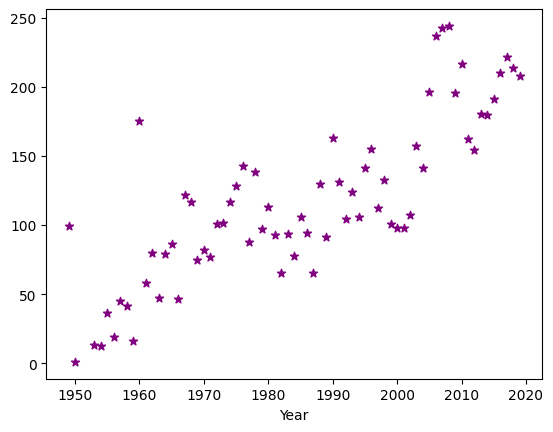

In [69]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2], marker='*', color='purple')
plt.xlabel('Year')

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [96]:
a = sets.groupby('theme_id').count()
b = a[['num_parts']]
b.rename(columns={'num_parts': 'num_sets'}, inplace = True)
sets_per_theme = b.sort_values('num_sets', ascending=False)
sets_per_theme.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_12472\1797024436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.rename(columns={'num_parts': 'num_sets'}, inplace = True)


,num_sets
theme_id,
158,753
501,656
494,398
435,356
503,329


In [97]:
most_popular = sets_per_theme.iloc[0]
most_popular

num_sets    753
Name: 158, dtype: int64

display the database schema:

<img src = 'https://imgur.com/Sg4lcjx.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [78]:
themes = pd.read_csv('data/themes.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [79]:
themes[themes['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [91]:
themes[themes['id'] == 158]

,id,name,parent_id
150,158,Star Wars,NaN


### Merging (i.e., Combining) DataFrames based on a Key


In [103]:
a = sets.groupby('theme_id').count()
b = a[['num_parts']]
b.rename(columns={'num_parts': 'num_sets'}, inplace = True)
sets_per_theme = b.sort_values('num_sets', ascending=False)
# sets_per_theme_df = pd.DataFrame({'id': sets_per_theme.index, 'sets_count': sets_per_theme.values})
sets_per_theme_df = sets_per_theme.reset_index().rename(columns={'theme_id': 'id', 'num_sets': 'sets_count'})
sets_per_theme_df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_12472\1485032256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.rename(columns={'num_parts': 'num_sets'}, inplace = True)


,id,sets_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [104]:
merged_df = pd.merge(sets_per_theme_df, themes, on='id')
merged_df.head()

,id,sets_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

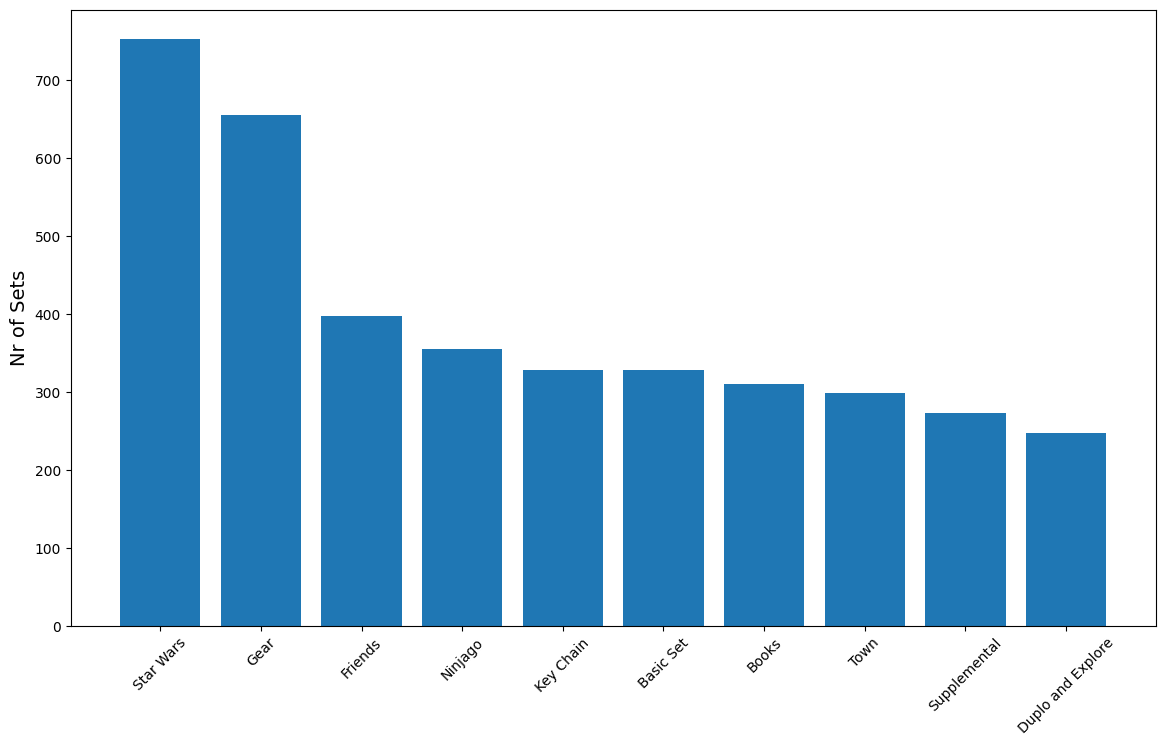

In [112]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)
plt.ylabel('Nr of Sets', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.sets_count[:10])